In [1]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [52, 48]


In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([53., 47.])

In [4]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.4500, 0.5500])

In [5]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.4896, 0.5104])

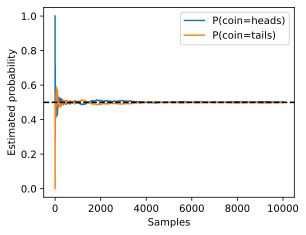

In [6]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [7]:
estimates

array([[1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.6666667 , 0.33333334],
       ...,
       [0.5019004 , 0.49809963],
       [0.5019502 , 0.4980498 ],
       [0.5019    , 0.4981    ]], dtype=float32)

1. Give an example where observing more data can reduce the amount of uncertainty about the outcome to an arbitrarily low level.

Rolling an unknown-biased dice $n$ times

2. Give an example where observing more data will only reduce the amount of uncertainty up to a point and then no further. Explain why this is the case and where you expect this point to occur.

An example where observing more data reduces uncertainty up to a certain point is in medical testing for a rare disease with a fixed sensitivity and specificity.

Let's consider a hypothetical rare disease where only 1 in 10,000 people have it. A diagnostic test is developed to detect this disease, and it has a sensitivity of 95% (correctly identifies 95% of individuals with the disease) and a specificity of 99% (correctly identifies 99% of individuals without the disease).

Initially, if you test a small number of individuals, the uncertainty about whether an individual has the disease or not is high due to the rarity of the disease and the limited data available. However, as you test more individuals, the uncertainty decreases as you gather more information.

At some point, as you continue to test more individuals, you will reach a limit where additional data will not significantly reduce uncertainty any further. This occurs because the sensitivity and specificity of the test are fixed, and they represent inherent limitations in the accuracy of the test.

In this case, no matter how many additional individuals you test, you cannot completely eliminate uncertainty because the test may produce false positives and false negatives. The sensitivity of 95% means that there will always be a small percentage of individuals with the disease who test negative, leading to uncertainty about their true status. Similarly, the specificity of 99% means that there will always be a small percentage of individuals without the disease who test positive, causing uncertainty about their true status as well.

The point where additional data ceases to significantly reduce uncertainty depends on the characteristics of the test, such as its sensitivity and specificity. In this example, with a sensitivity of 95% and specificity of 99%, you can expect the point of diminishing returns in uncertainty reduction to occur as the number of tested individuals increases and you approach a relatively large sample size.

3. We empirically demonstrated convergence to the mean for the toss of a coin. Calculate the variance of the estimate of the probability that we see a head after drawing 
 samples.

How does the variance scale with the number of observations?

Use Chebyshev’s inequality to bound the deviation from the expectation.

How does it relate to the central limit theorem?